In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

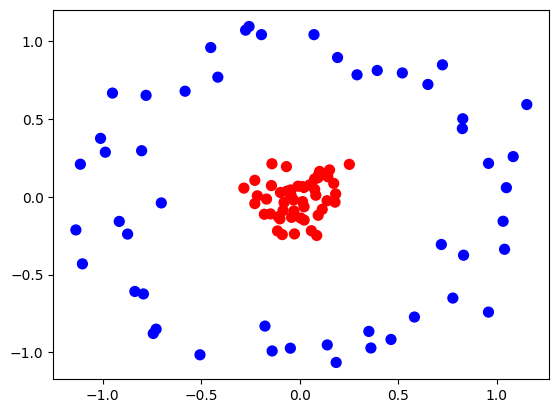

In [4]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [6]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.3

In [8]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_31284\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


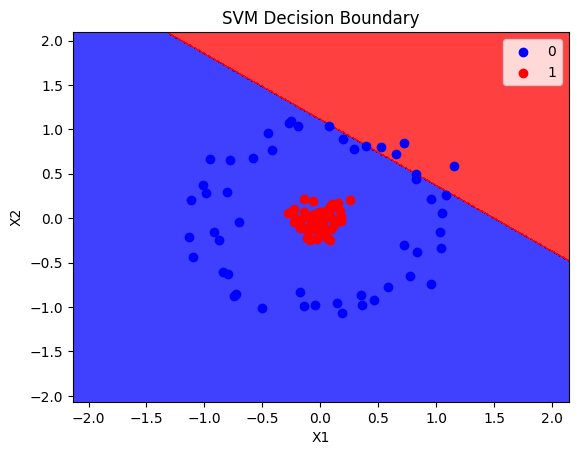

In [9]:
plot_decision_boundary(X, y, classifier)


In [11]:
# we are calculating here the z axis value fo very point here and by the help of thi we will make our data 3d and this is a svm kernal trick
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

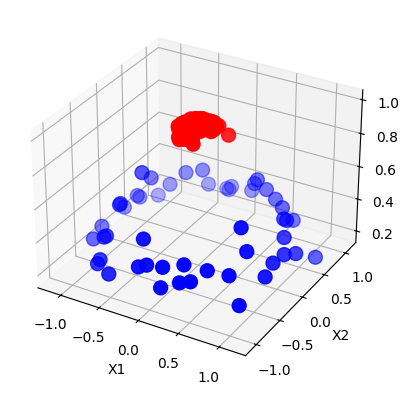

In [12]:
plot_3d_plot(X,y)


In [13]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)


1.0

C:\Users\Dell\AppData\Local\Temp\ipykernel_31284\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


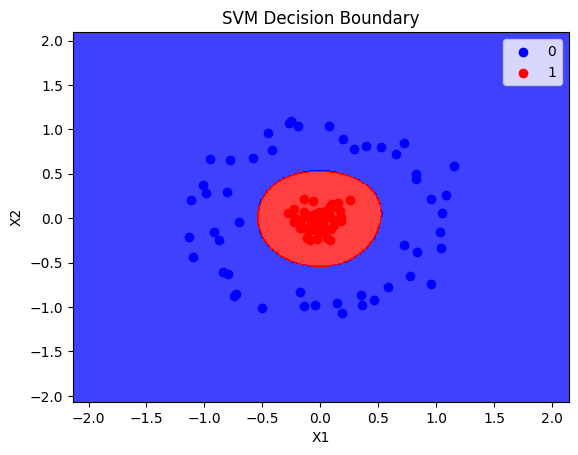

In [15]:
plot_decision_boundary(X, y, rbf_classifier)


In [16]:
X


array([[ 0.01423488,  0.06575294],
       [ 0.13870219, -0.02544953],
       [ 0.02190267, -0.06438475],
       [-0.80163712,  0.29615037],
       [ 0.95723507, -0.741818  ],
       [ 0.19187259,  0.89552727],
       [ 0.182324  ,  0.01816857],
       [ 0.14259303,  0.12880024],
       [ 0.17247492,  0.08609292],
       [-0.58116398,  0.67882212],
       [-0.03106926, -0.02061781],
       [-0.41514949,  0.76914293],
       [-0.22765895, -0.04368874],
       [-0.16839051, -0.01469195],
       [-0.91510278, -0.15846801],
       [-0.45119259,  0.9597347 ],
       [-0.83591814, -0.60901811],
       [ 0.82690435,  0.5016877 ],
       [ 0.77655604, -0.65140663],
       [ 0.02131455,  0.0598386 ],
       [ 0.0723882 ,  1.04258141],
       [ 1.0388953 , -0.3376807 ],
       [-0.22759081,  0.10578334],
       [-0.17619198, -0.83151074],
       [ 0.15117137,  0.17256507],
       [ 0.09364295, -0.11884204],
       [-0.06732465,  0.19389946],
       [-0.72817504, -0.85129478],
       [-0.77911392,

In [17]:
X_new=np.exp(-(X**2))


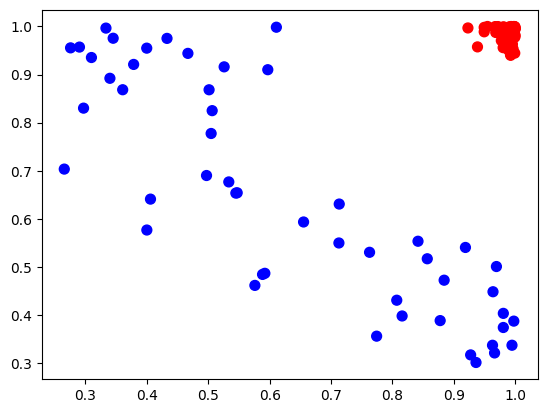

In [18]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')
